In [5]:
using JSON
using PGFPlotsX
using PyCall
using Colors
using LaTeXStrings
using Glob
np = pyimport("numpy")

function read_calcfile(dir::String)
    return JSON.parsefile(dir)
end

function  get_values(file)
    data        =  read_calcfile(file)
    bands       =  np.array(data["energies"])
    nbnds       =  data["nbnd"]
    kptcoords   =  data["klabels_coords"]
    klabels     =  data["klabels"]
    vbm_edge    =  np.array(data["vbm_edge"])
    cbm_edge    =  np.array(data["cbm_edge"])
    cbm_point   =  np.array(data["cbm_point"])
    vbm_point   =  np.array(data["vbm_point"])
    cbm         =  np.array(data["cbm"])
    vbm         =  np.array(data["vbm"])
    tot_en      = data["tot_en"]
    vol_cell    = data["vol_cell"]
    ef          = data["ef"]

    rdata = Dict("bands"=>bands,
                "nbnds"=>nbnds,
                 "kptcoords"=> kptcoords,
                 "klabels"=> klabels,
                 "cbm"=>cbm,
                 "vbm"=>vbm,
                 "cbm_edge"=>cbm_edge,
                 "vbm_edge"=>vbm_edge,
                 "cbm_point"=>cbm_point,
                 "vbm_point"=>vbm_point,
                 "tot_en"=>tot_en,
                 "vol_cell"=>vol_cell,
                 "ef"=>ef,
                 )
    return rdata
end 

push!(PGFPlotsX.CUSTOM_PREAMBLE, raw"\pgfplotsset{compat=1.16}")
push!(PGFPlotsX.CUSTOM_PREAMBLE, raw"\usepgfplotslibrary{colormaps}")
push!(PGFPlotsX.CUSTOM_PREAMBLE, raw"\usepgfplotslibrary{colorbrewer}")
push!(PGFPlotsX.CUSTOM_PREAMBLE,raw"\pgfplotsset{cycle list/GnBu}")


4-element Vector{String}:
 "\\pgfplotsset{compat=1.16}"
 "\\usepgfplotslibrary{colormaps}"
 "\\usepgfplotslibrary{colorbrewer}"
 "\\pgfplotsset{cycle list/GnBu}"

In [3]:
function get_kxaxis(files,nplot)
    xtick       = get_values(files[nplot])["kptcoords"]
    xticklabels = get_values(files[nplot])["klabels"]
    xmin = xtick[1]
    xmax = xtick[end]
    out = Dict(
    "xtick"=>xtick,
    "xticklabels"=>xticklabels,
    "xmin" => xmin,
    "xmax" =>xmax,
        )
        return out
end 
files1 =Glob.glob("../QE/work-1/bands-json/Sb2Te3-uatsx-c1-*.json")
files2 =Glob.glob("../QE/work-1/bands-json/Sb2Te3-uatsx-c2-soc-*.json")

6-element Vector{String}:
 "../QE/work-1/bands-json/Sb2Te3-uatsx-c2-soc-0.0.json"
 "../QE/work-1/bands-json/Sb2Te3-uatsx-c2-soc-1.0.json"
 "../QE/work-1/bands-json/Sb2Te3-uatsx-c2-soc-2.0.json"
 "../QE/work-1/bands-json/Sb2Te3-uatsx-c2-soc-3.0.json"
 "../QE/work-1/bands-json/Sb2Te3-uatsx-c2-soc-4.0.json"
 "../QE/work-1/bands-json/Sb2Te3-uatsx-c2-soc-5.0.json"

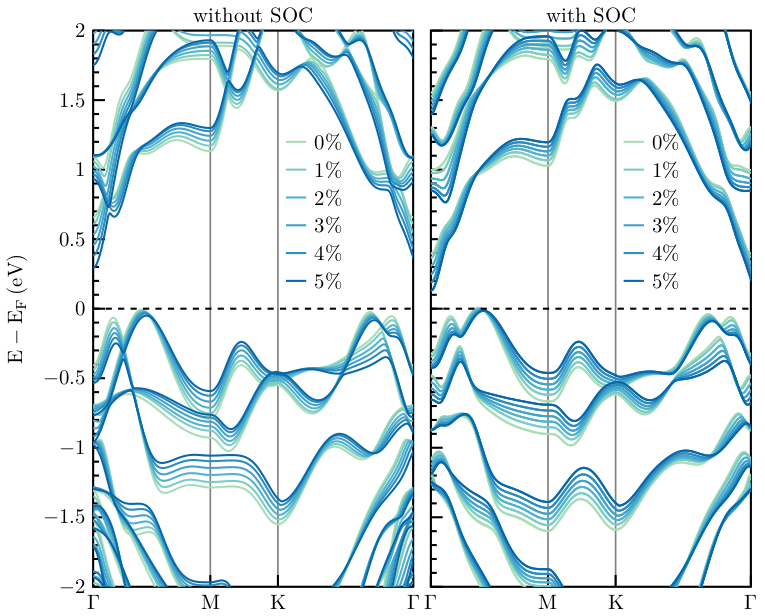

In [ ]:

tp = @pgf TikzPicture({ })
@pgf bands =GroupPlot(
    {
        group_style =
        {
            group_size="2 by 1",
            "vertical sep=0mm",
            "horizontal sep=3mm",
        },
        #"cycle list name=RdBu-9-reversed",
        "width=7cm", "height=11cm",
        xmin=get_kxaxis(files1,1)["xmin"],xmax=get_kxaxis(files1,1)["xmax"],
        "major tick length = 2mm",
        "minor tick length = 1mm",
        "minor y tick num=4",
        "ylabel style={scale=1.0}",
        "xlabel style={scale=1.0}",
        "every axis plot/.style={smooth,no marks,line width=1pt}",
        "axis line style={line width=1.0pt,line cap=round}",
        "every axis/.append style={line width=1.0pt,tick style = {line width=1.0pt,black},ticklabel style={scale=1.0}}",
        "xtick distance=1",
        "xtick pos=left",
        "ytick pos=left",
        ymin=-2,ymax=2,
        xtick = get_kxaxis(files1,1)["xtick"],
        xticklabels =get_kxaxis(files1,1)["xticklabels"],
        xmajorgrids,
        "major x grid style={gray,thick}",
        "title style={yshift=-2mm,scale=1.0}",
       
    },
{title="without SOC", ylabel = L"\mathrm{E-E_{\mathrm{F}}\,(eV)}",
},
[Plot({"color=GnBu-F"},Table("x"=>get_values(files1[1])["bands"][1,:,1],"y"=>get_values(files1[1])["bands"][1,:,k])) for k=30:50],
[Plot({"color=GnBu-G"},Table("x"=>get_values(files1[2])["bands"][1,:,1],"y"=>get_values(files1[2])["bands"][1,:,k])) for k=30:50],
[Plot({"color=GnBu-H"},Table("x"=>get_values(files1[3])["bands"][1,:,1],"y"=>get_values(files1[3])["bands"][1,:,k])) for k=30:50],
[Plot({"color=GnBu-I"},Table("x"=>get_values(files1[4])["bands"][1,:,1],"y"=>get_values(files1[4])["bands"][1,:,k])) for k=30:50],
[Plot({"color=GnBu-J"},Table("x"=>get_values(files1[5])["bands"][1,:,1],"y"=>get_values(files1[5])["bands"][1,:,k])) for k=30:50],
[Plot({"color=GnBu-K"},Table("x"=>get_values(files1[6])["bands"][1,:,1],"y"=>get_values(files1[6])["bands"][1,:,k])) for k=30:50],
Plot({forget_plot, no_marks,dashed},Coordinates([0,get_values(files1[1])["kptcoords"][end]],[0,0])),


raw"\draw[color=GnBu-F]  (axis cs: 0.95,1.2)--(axis cs:1.05,1.2) node[anchor=west,black] {$0\%$};",
raw"\draw[color=GnBu-G]  (axis cs: 0.95,1.0)--(axis cs:1.05,1.0) node[anchor=west,black] {$1\%$};",
raw"\draw[color=GnBu-H]  (axis cs: 0.95,0.8)--(axis cs:1.05,0.8) node[anchor=west,black] {$2\%$};",
raw"\draw[color=GnBu-I]  (axis cs: 0.95,0.6)--(axis cs:1.05,0.6) node[anchor=west,black] {$3\%$};",
raw"\draw[color=GnBu-J]  (axis cs: 0.95,0.4)--(axis cs:1.05,0.4) node[anchor=west,black] {$4\%$};",
raw"\draw[color=GnBu-K]  (axis cs: 0.95,0.2)--(axis cs:1.05,0.2) node[anchor=west,black] {$5\%$};",

{"yticklabels={}",title="with SOC"},
[Plot({"color=GnBu-F"},Table("x"=>get_values(files2[1])["bands"][1,:,1],"y"=>get_values(files2[1])["bands"][1,:,k])) for k=70:90],
[Plot({"color=GnBu-G"},Table("x"=>get_values(files2[2])["bands"][1,:,1],"y"=>get_values(files2[2])["bands"][1,:,k])) for k=70:90],
[Plot({"color=GnBu-H"},Table("x"=>get_values(files2[3])["bands"][1,:,1],"y"=>get_values(files2[3])["bands"][1,:,k])) for k=70:90],
[Plot({"color=GnBu-I"},Table("x"=>get_values(files2[4])["bands"][1,:,1],"y"=>get_values(files2[4])["bands"][1,:,k])) for k=70:90],
[Plot({"color=GnBu-J"},Table("x"=>get_values(files2[5])["bands"][1,:,1],"y"=>get_values(files2[5])["bands"][1,:,k])) for k=70:90],
[Plot({"color=GnBu-K"},Table("x"=>get_values(files2[6])["bands"][1,:,1],"y"=>get_values(files2[6])["bands"][1,:,k])) for k=70:90],
Plot({forget_plot, no_marks,dashed},Coordinates([0,get_values(files2[1])["kptcoords"][end]],[0,0])),


raw"\draw[color=GnBu-F]  (axis cs: 0.95,1.2)--(axis cs:1.05,1.2) node[anchor=west,black] {$0\%$};",
raw"\draw[color=GnBu-G]  (axis cs: 0.95,1.0)--(axis cs:1.05,1.0) node[anchor=west,black] {$1\%$};",
raw"\draw[color=GnBu-H]  (axis cs: 0.95,0.8)--(axis cs:1.05,0.8) node[anchor=west,black] {$2\%$};",
raw"\draw[color=GnBu-I]  (axis cs: 0.95,0.6)--(axis cs:1.05,0.6) node[anchor=west,black] {$3\%$};",
raw"\draw[color=GnBu-J]  (axis cs: 0.95,0.4)--(axis cs:1.05,0.4) node[anchor=west,black] {$4\%$};",
raw"\draw[color=GnBu-K]  (axis cs: 0.95,0.2)--(axis cs:1.05,0.2) node[anchor=west,black] {$5\%$};",
)
push!(tp,bands)
display("image/png", tp)
# pgfsave("/media/rbnfiles/ruco/research/papers/Sb2Te3-2025/v5_reply/images/fig-1.pdf",uats_bands)

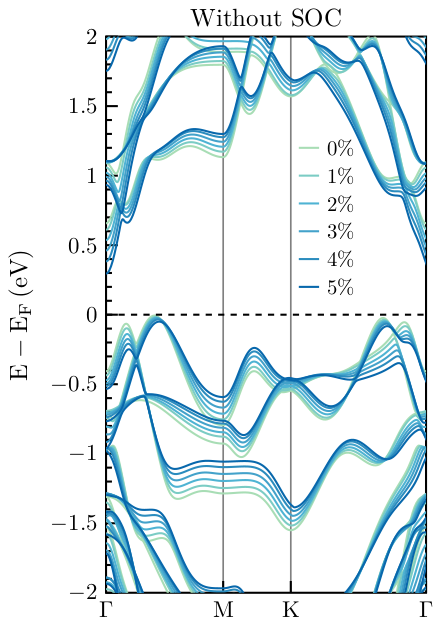

In [7]:
tp = @pgf TikzPicture({ })
@pgf bands_wou_soc =@pgf  Axis(
    {
        group_style =
        {
            group_size="2 by 1",
            "vertical sep=0mm",
            "horizontal sep=10mm",
        },
        #"cycle list name=RdBu-9-reversed",
        "width=7cm", "height=11cm",
        xmin=get_kxaxis(files1,1)["xmin"],xmax=get_kxaxis(files1,1)["xmax"],
        "major tick length = 2mm",
        "minor tick length = 1mm",
        "minor y tick num=4",
         "ylabel style={anchor=south,scale=1.2,at={(yticklabel cs:0.5)}}",
        "xlabel style={scale=1.2}",
        "every axis plot/.style={smooth,no marks,line width=1pt}",
        "axis line style={line width=1.0pt,line cap=round}",
        "every axis/.append style={line width=1.0pt,tick style = {line width=1.0pt,black},ticklabel style={scale=1.1}}",
        "xtick distance=1",
        "xtick pos=left",
        "ytick pos=left",
        ymin=-2,ymax=2,
        xtick = get_kxaxis(files1,1)["xtick"],
        xticklabels =get_kxaxis(files1,1)["xticklabels"],
        xmajorgrids,
        "major x grid style={gray,thick}",
        "title style={yshift=-2mm,scale=1.2}",
        title="Without SOC", ylabel = L"\mathrm{E-E_{\mathrm{F}}\,(eV)}",
    },
    [Plot({"color=GnBu-F"},Table("x"=>get_values(files1[1])["bands"][1,:,1],"y"=>get_values(files1[1])["bands"][1,:,k])) for k=30:50],
[Plot({"color=GnBu-G"},Table("x"=>get_values(files1[2])["bands"][1,:,1],"y"=>get_values(files1[2])["bands"][1,:,k])) for k=30:50],
[Plot({"color=GnBu-H"},Table("x"=>get_values(files1[3])["bands"][1,:,1],"y"=>get_values(files1[3])["bands"][1,:,k])) for k=30:50],
[Plot({"color=GnBu-I"},Table("x"=>get_values(files1[4])["bands"][1,:,1],"y"=>get_values(files1[4])["bands"][1,:,k])) for k=30:50],
[Plot({"color=GnBu-J"},Table("x"=>get_values(files1[5])["bands"][1,:,1],"y"=>get_values(files1[5])["bands"][1,:,k])) for k=30:50],
[Plot({"color=GnBu-K"},Table("x"=>get_values(files1[6])["bands"][1,:,1],"y"=>get_values(files1[6])["bands"][1,:,k])) for k=30:50],
Plot({forget_plot, no_marks,dashed},Coordinates([0,get_values(files1[1])["kptcoords"][end]],[0,0])),


raw"\draw[color=GnBu-F]  (axis cs: 0.95,1.2)--(axis cs:1.05,1.2) node[anchor=west,black] {$0\%$};",
raw"\draw[color=GnBu-G]  (axis cs: 0.95,1.0)--(axis cs:1.05,1.0) node[anchor=west,black] {$1\%$};",
raw"\draw[color=GnBu-H]  (axis cs: 0.95,0.8)--(axis cs:1.05,0.8) node[anchor=west,black] {$2\%$};",
raw"\draw[color=GnBu-I]  (axis cs: 0.95,0.6)--(axis cs:1.05,0.6) node[anchor=west,black] {$3\%$};",
raw"\draw[color=GnBu-J]  (axis cs: 0.95,0.4)--(axis cs:1.05,0.4) node[anchor=west,black] {$4\%$};",
raw"\draw[color=GnBu-K]  (axis cs: 0.95,0.2)--(axis cs:1.05,0.2) node[anchor=west,black] {$5\%$};",
)

push!(tp,bands_wou_soc)
display("image/png",tp)
pgfsave("../Manuscript_images/fig-1/bands/plot_gga_wou_soc.pdf",tp)
# pgfsave("plots/plot_gga_wou_soc.pdf",tp)

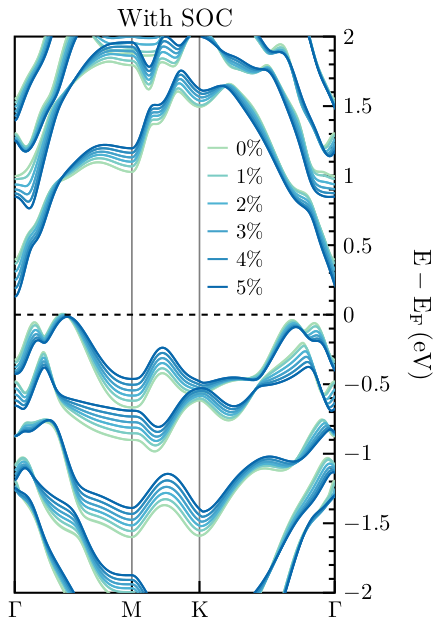

In [9]:
tpp = @pgf TikzPicture({ })
@pgf bands_w_soc =@pgf  Axis(
    {
        #"cycle list name=RdBu-9-reversed",
        "width=7cm", "height=11cm",
        xmin=get_kxaxis(files1,1)["xmin"],xmax=get_kxaxis(files1,1)["xmax"],
        "major tick length = 2mm",
        "minor tick length = 1mm",
        "minor y tick num=4",
        "ylabel style={anchor=south,scale=1.2,at={(yticklabel cs:0.5)},rotate=180}",
        "xlabel style={scale=1.2}",
        "every axis plot/.style={smooth,no marks,line width=1pt}",
        "axis line style={line width=1.0pt,line cap=round}",
        "every axis/.append style={line width=1.0pt,tick style = {line width=1.0pt,black},ticklabel style={scale=1.1}}",
        "xtick distance=1",
        "xtick pos=left",
        "ytick pos=right",
        ymin=-2,ymax=2,
        xtick = get_kxaxis(files1,1)["xtick"],
        xticklabels =get_kxaxis(files1,1)["xticklabels"],
        xmajorgrids,
        "major x grid style={gray,thick}",
        "title style={yshift=-2mm,scale=1.2}",
        title="With SOC", ylabel = L"\mathrm{E-E_{\mathrm{F}}\,(eV)}",
    },
[Plot({"color=GnBu-F"},Table("x"=>get_values(files2[1])["bands"][1,:,1],"y"=>get_values(files2[1])["bands"][1,:,k])) for k=70:90],
[Plot({"color=GnBu-G"},Table("x"=>get_values(files2[2])["bands"][1,:,1],"y"=>get_values(files2[2])["bands"][1,:,k])) for k=70:90],
[Plot({"color=GnBu-H"},Table("x"=>get_values(files2[3])["bands"][1,:,1],"y"=>get_values(files2[3])["bands"][1,:,k])) for k=70:90],
[Plot({"color=GnBu-I"},Table("x"=>get_values(files2[4])["bands"][1,:,1],"y"=>get_values(files2[4])["bands"][1,:,k])) for k=70:90],
[Plot({"color=GnBu-J"},Table("x"=>get_values(files2[5])["bands"][1,:,1],"y"=>get_values(files2[5])["bands"][1,:,k])) for k=70:90],
[Plot({"color=GnBu-K"},Table("x"=>get_values(files2[6])["bands"][1,:,1],"y"=>get_values(files2[6])["bands"][1,:,k])) for k=70:90],
Plot({forget_plot, no_marks,dashed},Coordinates([0,get_values(files2[1])["kptcoords"][end]],[0,0])),


raw"\draw[color=GnBu-F]  (axis cs: 0.95,1.2)--(axis cs:1.05,1.2) node[anchor=west,black] {$0\%$};",
raw"\draw[color=GnBu-G]  (axis cs: 0.95,1.0)--(axis cs:1.05,1.0) node[anchor=west,black] {$1\%$};",
raw"\draw[color=GnBu-H]  (axis cs: 0.95,0.8)--(axis cs:1.05,0.8) node[anchor=west,black] {$2\%$};",
raw"\draw[color=GnBu-I]  (axis cs: 0.95,0.6)--(axis cs:1.05,0.6) node[anchor=west,black] {$3\%$};",
raw"\draw[color=GnBu-J]  (axis cs: 0.95,0.4)--(axis cs:1.05,0.4) node[anchor=west,black] {$4\%$};",
raw"\draw[color=GnBu-K]  (axis cs: 0.95,0.2)--(axis cs:1.05,0.2) node[anchor=west,black] {$5\%$};",
)

push!(tpp,bands_w_soc)
display("image/png",tpp)
pgfsave("../Manuscript_images/fig-1/bands/plot_gga_w_soc.pdf",tpp)

# pgfsave("plots/plot_gga_w_soc.pdf",tpp)